## Library and Data imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_df = pd.read_csv(r"C:\radha\GitHub\Gold-Price-Prediction\Gold_data_Excel.csv",parse_dates = ['date'],index_col='date')
raw_df.head()

,price
date,
2016-01-01,2252.60
2016-01-02,2454.50
2016-01-03,2708.10
2016-01-04,2577.80
2016-01-05,2597.75


In [3]:
raw_df.tail()

,price
date,
2021-12-17,4394.4
2021-12-18,4389.5
2021-12-19,4389.5
2021-12-20,4354.1
2021-12-21,4346.5


### ACF and PCF plot monthly mean
+ Only the monthly plot is considered the model prepration because there is so much monthly mean appears to be most smoothened as compared to the weekly mean

In [4]:
monthly_mean_df = raw_df.resample('M').mean()
monthly_mean_df.head()

,price
date,
2016-01-31,2495.832258
2016-02-29,2688.703448
2016-03-31,2682.854839
2016-04-30,2677.790000
2016-05-31,2677.650000


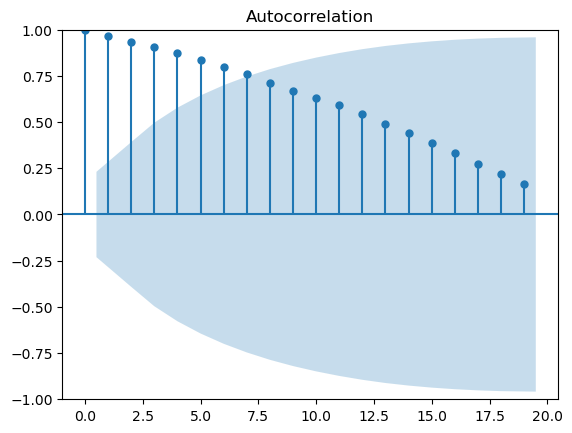

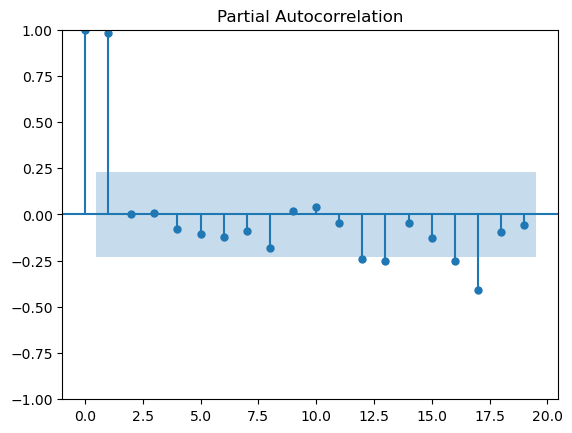

In [5]:
monthly_acf = plot_acf(monthly_mean_df)
monthly_pacf = plot_pacf(monthly_mean_df)

### Parameters for 30 day mean ARIMA 
+ calculated using the auto_arima function which comares the models w.r.t AIC values and returns the order which is having least AIC value

In [6]:
step_wise_fit_monthly_mean = auto_arima(monthly_mean_df,trace=True,suppress_warnings=True)
step_wise_fit_monthly_mean.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=853.440, Time=0.30 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=850.923, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=852.235, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=852.021, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=853.980, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=849.580, Time=0.09 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=851.210, Time=0.12 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=851.300, Time=0.11 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=852.254, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=853.570, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=851.888, Time=0.03 sec

Best model:  ARIMA(1,1,1)(0,0,0)[0] intercept
Total fit time: 0.948 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 1)   Log Likelihood                -420.790
Date:                Thu, 28 Mar 2024   AIC                            849.580
Time:                        21:52:00   BIC                            858.631
Sample:                    01-31-2016   HQIC                           853.179
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     42.4441     28.868      1.470      0.141     -14.137      99.025
ar.L1         -0.6404      0.249     -2.577      0.010      -1.128      -0.153
ma.L1          0.8600      0.148      5.814      0.000       0.570       1.150
sigma2      8217.4221   1229.943      6.681      0.000    5806.779    1.06e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):               151.03
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                             1.88
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.07
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Train Test Data sepration

## Monthly mean

In [7]:
monthly_mean_df.shape

(72, 1)

In [8]:
train_monthly_mean = monthly_mean_df.iloc[:-12]
test_monthly_mean = monthly_mean_df.iloc[-12:]

In [9]:
print(f"Shape of training Data is :- {train_monthly_mean.shape},\nShape of testing Data is :- {test_monthly_mean.shape}")

Shape of training Data is :- (60, 1),
Shape of testing Data is :- (12, 1)


## Model Fitting

## 1. ARIMA model

In [10]:
monthly_mean_model = ARIMA(train_monthly_mean['price'],order=(1,1,1))
monthly_mean_model = monthly_mean_model.fit()
monthly_mean_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  price   No. Observations:                   60
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -354.159
Date:                Thu, 28 Mar 2024   AIC                            714.318
Time:                        21:52:00   BIC                            720.551
Sample:                    01-31-2016   HQIC                           716.751
                         - 12-31-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9380      0.191      4.905      0.000       0.563       1.313
ma.L1         -0.8452      0.306     -2.763      0.006      -1.445      -0.246
sigma2      9558.2562    997.935      9.578      0.000    7602.340    1.15e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               214.27
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               5.44   Skew:                             2.26
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## ARIMA Monthly mean prediction

In [11]:
start = len(train_monthly_mean)
end = start+ len(test_monthly_mean)-1
pred = monthly_mean_model.predict(start=start,end=end,type='levels')
pred

2021-01-31    4351.448330
2021-02-28    4370.453380
2021-03-31    4388.280129
2021-04-30    4405.001631
2021-05-31    4420.686411
2021-06-30    4435.398745
2021-07-31    4449.198924
2021-08-31    4462.143500
2021-09-30    4474.285522
2021-10-31    4485.674745
2021-11-30    4496.357845
2021-12-31    4506.378599
Freq: M, Name: predicted_mean, dtype: float64

## Prediction Plots

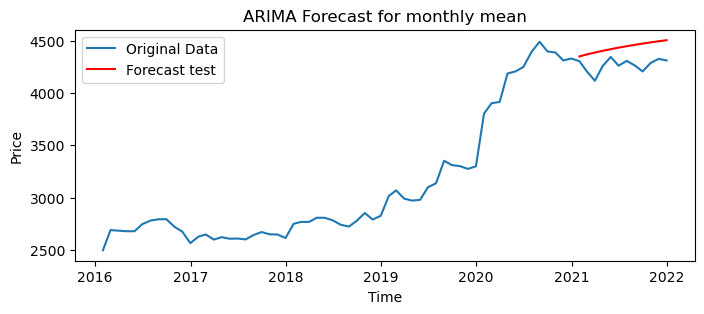

In [12]:
# Plot the original data and forecast
plt.figure(figsize=(8, 3))
plt.plot(monthly_mean_df['price'], label='Original Data')
plt.plot(pred, label='Forecast test', color='red')
plt.title('ARIMA Forecast for monthly mean')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Error Calculation

In [13]:
rmse = sqrt(mean_squared_error(test_monthly_mean,pred))
print(rmse)

180.7706347055716


In [14]:
test_monthly_mean.mean()

price    4267.608846
dtype: float64

In [15]:
Accuracy  = 100 - rmse*100/test_monthly_mean.mean()
print(f"Percentage prediction error is {round(Accuracy[0],2)} %")

Percentage prediction error is 95.76 %


## Build ARMA model 

In [16]:
# Define the ARMA parameters
order = (3, 0, 1)  # (p, d=0, q)

# Fit the ARMA model
arma_model = ARIMA(train_monthly_mean['price'], order=order)
arma_model = arma_model.fit()

## Predit for ARMA model

In [17]:
start = len(train_monthly_mean)
end = start+ len(test_monthly_mean)-1
pred_arma = arma_model.predict(start=start,end=end,type='levels')
pred_arma

2021-01-31    4368.690390
2021-02-28    4328.552578
2021-03-31    4338.234689
2021-04-30    4314.554672
2021-05-31    4313.391635
2021-06-30    4297.266394
2021-07-31    4291.317229
2021-08-31    4278.681367
2021-09-30    4270.668438
2021-10-31    4259.691314
2021-11-30    4250.837963
2021-12-31    4240.694485
Freq: M, Name: predicted_mean, dtype: float64

## Error calculation for ARMA model

In [18]:
rmse_arma = sqrt(mean_squared_error(test_monthly_mean,pred_arma))
print(rmse_arma)

85.88230393104789


In [19]:
Accuracy  = 100 - rmse_arma*100/test_monthly_mean.mean()
print(f"Percentage prediction Accuraxy is {round(Accuracy[0],2)} %")

Percentage prediction Accuraxy is 97.99 %


### Prediction plots

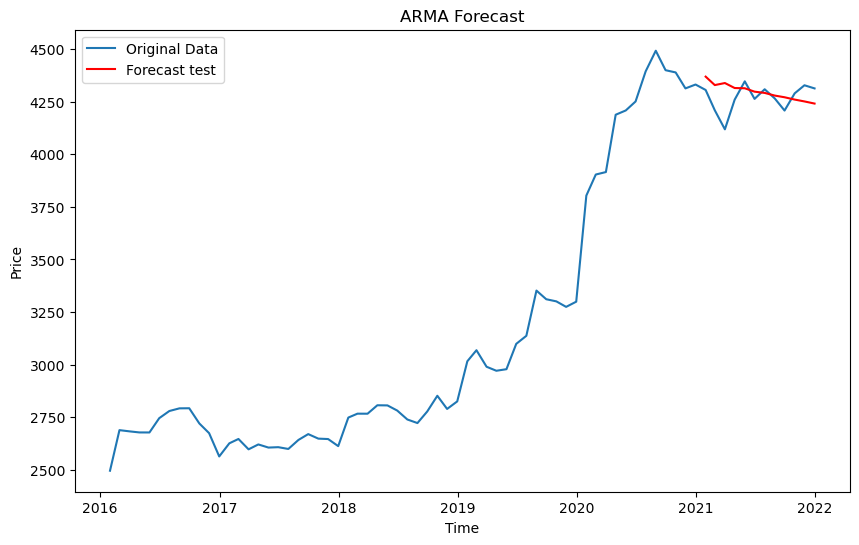

In [20]:
# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_df['price'], label='Original Data')
plt.plot(pred_arma, label='Forecast test', color='red')
plt.title('ARMA Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Srimax model

In [21]:
# ARIMA parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1,2,1,4)  # (P, D, Q, m)

In [22]:
# Fit the seasonal ARIMA model
sarimax_model = SARIMAX(train_monthly_mean['price'], order=order, seasonal_order=seasonal_order)
sarimax_model = sarimax_model.fit()

In [23]:
start = len(train_monthly_mean)
end = start+len(test_monthly_mean)-1
pred_sarima = sarimax_model.predict(start = start, end = end,type='levels')
pred_sarima

2021-01-31    4277.735230
2021-02-28    4274.341227
2021-03-31    4291.879183
2021-04-30    4349.310139
2021-05-31    4268.922608
2021-06-30    4246.524070
2021-07-31    4221.740565
2021-08-31    4266.681955
2021-09-30    4188.047604
2021-10-31    4158.026250
2021-11-30    4149.877559
2021-12-31    4204.686913
Freq: M, Name: predicted_mean, dtype: float64

## Error Calculation for SARIMA model

In [24]:
rmse = sqrt(mean_squared_error(test_monthly_mean,pred_sarima))
print(rmse)

99.14104400751705


In [25]:
Accuracy  = 100 - rmse*100/test_monthly_mean.mean()
print(f"Percentage prediction Accuracy is {round(Accuracy[0],2)} %")

Percentage prediction Accuracy is 97.68 %


## Prediction plot for SARIMAX model

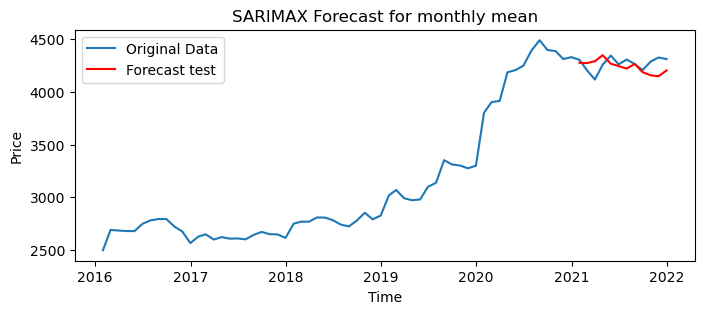

In [26]:
# Plot the original data and forecast
plt.figure(figsize=(8, 3))
plt.plot(monthly_mean_df['price'], label='Original Data')
plt.plot(pred_sarima, label='Forecast test', color='red')
plt.title('SARIMAX Forecast for monthly mean')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [27]:
sarimax_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             price   No. Observations:                   60
Model:             SARIMAX(1, 1, 1)x(1, 2, 1, 4)   Log Likelihood                -326.359
Date:                           Thu, 28 Mar 2024   AIC                            662.717
Time:                                   21:52:02   BIC                            672.376
Sample:                               01-31-2016   HQIC                           666.408
                                    - 12-31-2020                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9983     81.834      0.012      0.990    -159.394     161.390
ma.L1         -0.9962     38.483     -0.026      0.979     -76.422      74.429
ar.S.L4       -0.4343      0.217     -1.998      0.046      -0.860      -0.008
ma.S.L4       -0.9973     31.802     -0.031      0.975     -63.329      61.334
sigma2      1.627e+04   3.74e+05      0.043      0.965   -7.17e+05    7.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                31.37
Prob(Q):                              0.72   Prob(JB):                         0.00
Heteroskedasticity (H):               5.89   Skew:                             0.63
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### Final Model Preparation :- 

In [28]:
# Define the SARIMA parameters
order = (1, 1, 1)  # (p, d, q)
seasonal_order = (0, 1, [],20)  # (P, D, Q, m)

In [29]:
final_sarima_model = SARIMAX(monthly_mean_df['price'],order=order, seasonal_order=seasonal_order)
final_sarima_model = final_sarima_model.fit() # Specify covariance type as 'robust'
final_sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               price   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(0, 1, [], 20)   Log Likelihood                -327.247
Date:                             Thu, 28 Mar 2024   AIC                            660.494
Time:                                     21:52:02   BIC                            666.289
Sample:                                 01-31-2016   HQIC                           662.708
                                      - 12-31-2021                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6332      0.196     -3.239      0.001      -1.016      -0.250
ma.L1          0.9050      0.102      8.853      0.000       0.705       1.105
sigma2      2.182e+04   4414.484      4.943      0.000    1.32e+04    3.05e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 8.15
Prob(Q):                              0.64   Prob(JB):                         0.02
Heteroskedasticity (H):               3.94   Skew:                            -0.33
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
start = len(monthly_mean_df)
end = start+ len(test_monthly_mean)-1
predictions = final_sarima_model.predict(start=start,end=end,type='levels')
print(predictions)

2022-01-31    4307.342437
2022-02-28    4366.235461
2022-03-31    4499.169592
2022-04-30    4603.718625
2022-05-31    4506.990813
2022-06-30    4499.019364
2022-07-31    4421.454418
2022-08-31    4440.944709
2022-09-30    4414.300425
2022-10-31    4318.366566
2022-11-30    4227.510151
2022-12-31    4368.688256
Freq: M, Name: predicted_mean, dtype: float64


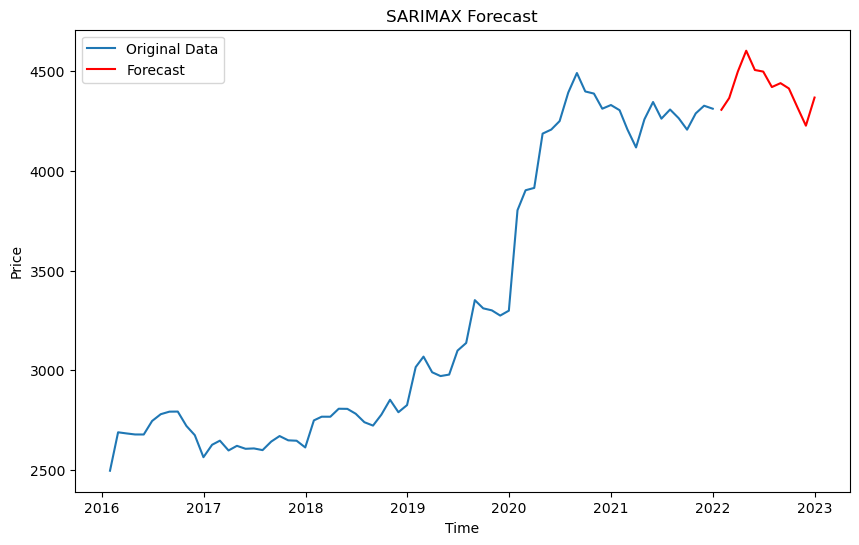

In [31]:
# Plot the original data and forecast
plt.figure(figsize=(10, 6))
plt.plot(monthly_mean_df['price'], label='Original Data')
plt.plot(predictions, label='Forecast', color='red')
plt.title('SARIMAX Forecast')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

## Deploy the model

In [32]:
from pickle import dump

In [35]:
dump(final_sarima_model, open('pred.pkl','wb'))